# Importing the libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Installing oneAPI Libraries

In [3]:
!pip install scikit-learn-intelex


Defaulting to user installation because normal site-packages is not writeable


# For directly using dataset from drive

In [4]:
#This code is useful for directly using csv from google drive link
!pip install gdown --no-warn-script-location


import gdown
# https://docs.google.com/spreadsheets/d/1h5tBu96EOMgsnSzG8_FluDVvu8PDChCF/edit?usp=drive_link&ouid=112174980036121639447&rtpof=true&sd=true
file_id = '1h5tBu96EOMgsnSzG8_FluDVvu8PDChCF'
destination = 'city_day.csv'
file_i='1h0mHdlv-QYPe2Snjaxuq6DTAvPqTyCgZ'
# Create the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(download_url, destination, quiet=False)

# Load the CSV into a DataFrame
df = pd.read_excel(destination)

# Display the DataFrame
print(df.head())

Defaulting to user installation because normal site-packages is not writeable


Downloading...
From: https://drive.google.com/uc?id=1h5tBu96EOMgsnSzG8_FluDVvu8PDChCF
To: /home/u49f9cf705d7567e1e2579bd53e0e38d/city_day.csv
100%|██████████| 530k/530k [00:00<00:00, 21.6MB/s]


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


# Checking the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.shape

(10683, 11)

# Looking for null values

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Furthur Data Preprocessing

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Checking the data types

In [12]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [13]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [15]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [16]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [17]:
df.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-10-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-10-25 05:50:00,2024-10-25 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-10-25 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-10-25 18:05:00,2024-10-25 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-10-25 16:50:00,2024-10-25 21:35:00,4h 45m,1 stop,No info,13302,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2024-10-25 09:00:00,2024-10-25 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2024-10-25 18:55:00,2024-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,12,3
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,2024-10-25 08:00:00,2024-03-02 05:05:00,21h 5m,1 stop,No info,22270,1,3
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,2024-10-25 08:55:00,2024-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,12,3
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,2024-10-25 11:25:00,2024-10-25 19:15:00,7h 50m,1 stop,No info,8625,27,5


In [18]:
df.drop('Date_of_Journey', axis=1, inplace=True)

From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns¶

In [19]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour

def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute


def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [20]:
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [21]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [22]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15


Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration¶

In [23]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [24]:
df['Duration']=duration

In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [27]:
df['dur_hour']=df['Duration'].apply(hour)

In [28]:
df['dur_min']=df['Duration'].apply(minutes)

In [29]:
df.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [30]:
drop_col(df,'Duration')

In [31]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int32
journey_month         int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
dur_hour             object
dur_min              object
dtype: object

In [32]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [33]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int32
journey_month         int32
Dep_Time_hour         int32
Dep_Time_min          int32
Arrival_Time_hour     int32
Arrival_Time_min      int32
dur_hour              int64
dur_min               int64
dtype: object

# Finding the categorical value

In [34]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

# Finding the continuous value

In [35]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

# **Handling categorical data**
We are using two main Encoding Techniques to covert Categorical data into some numerical format
Nominal data -- Data that are not in any order -->one hot encoding
ordinal data -- Data are in order --> labelEncoder

In [36]:
categorical = df[column]

In [37]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [38]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

# **Airline vs Price Analysis**

<Axes: xlabel='Airline', ylabel='Price'>

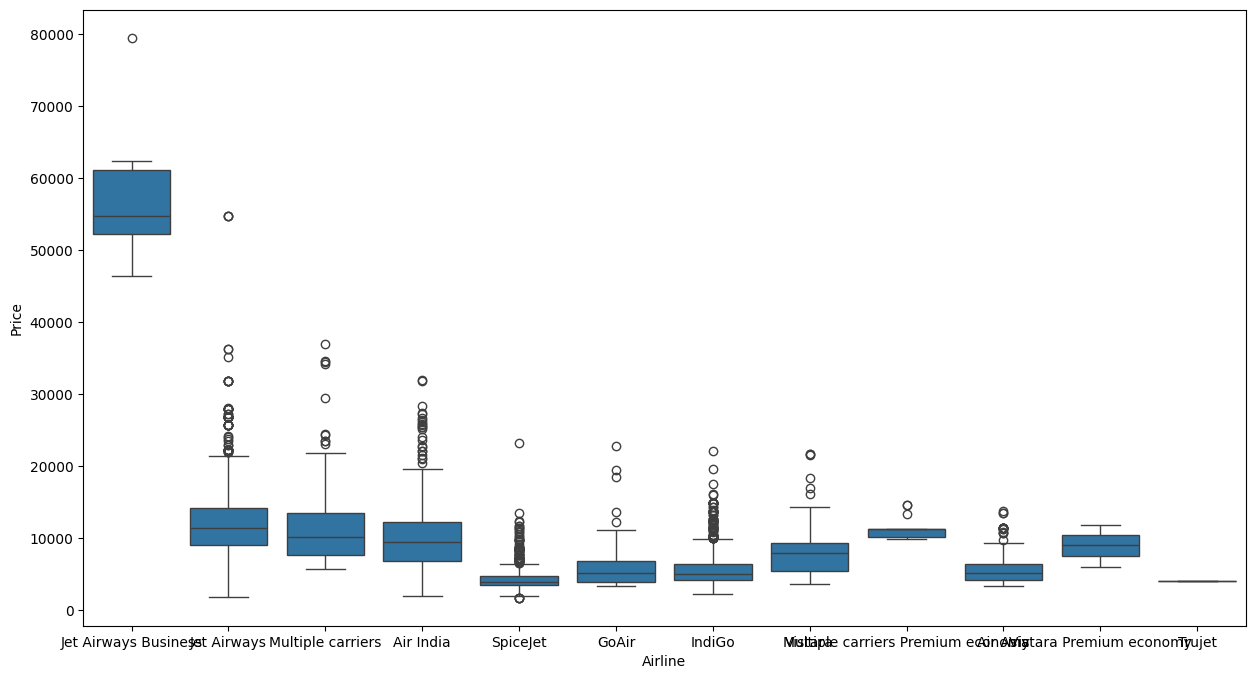

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

From graph we can see that Jet Airways Business have the highest Price. Apart from the first Airline almost all are having similar median

# Perform Total_Stops vs Price Analysis

<Axes: xlabel='Total_Stops', ylabel='Price'>

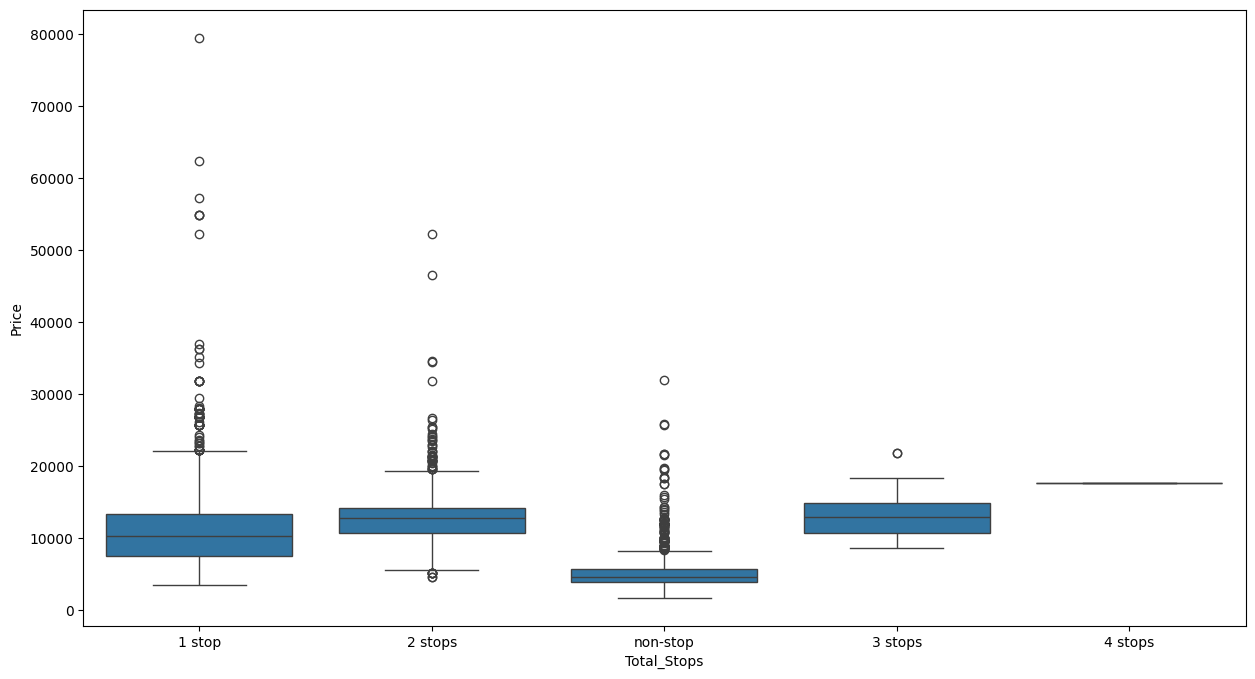

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [41]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [42]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [43]:
categorical['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Figure size 1500x1500 with 0 Axes>

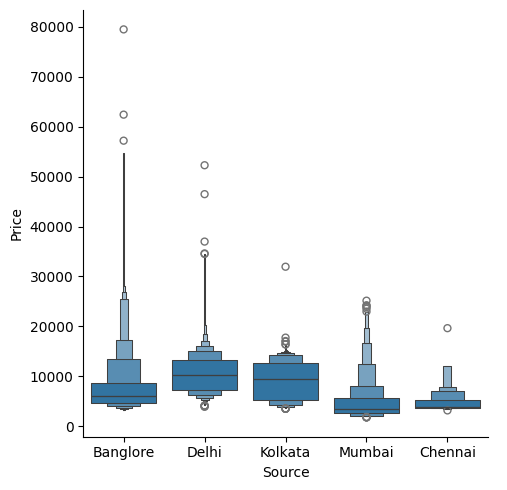

In [44]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [45]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()


,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [46]:
categorical['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

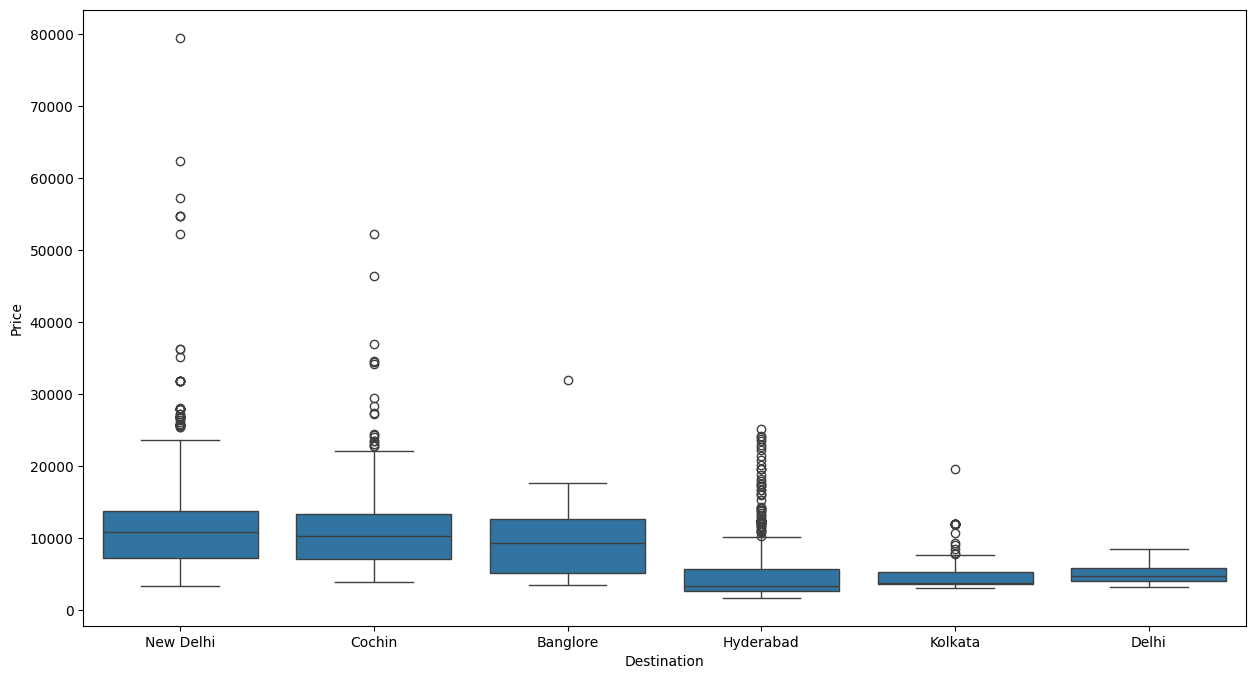

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

# Encoding the needed columns

In [48]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [49]:
# now work on route column
categorical['Route'].value_counts()

Route
DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → VNS → DEL → HYD                   1
BLR → HBX → BOM → NAG → DEL             1
BLR → BOM → IXC → DEL                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → BBI → HYD                         1
Name: count, Length: 128, dtype: int64

In [50]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [51]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [52]:
drop_col(categorical,'Route')

In [53]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [54]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [55]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [56]:
categorical.isnull().sum()


Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [57]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


<Axes: xlabel='Arrival_Time_hour', ylabel='Price'>

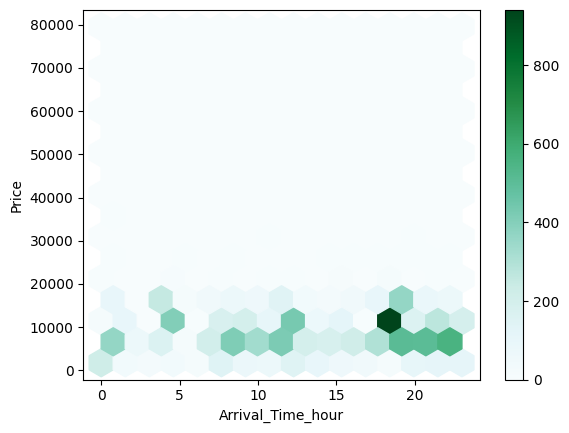

In [58]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [59]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [60]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [61]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [62]:
drop_col(categorical,'Additional_Info')

In [63]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [65]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [66]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

# Now we will finalize the dataset by checking the columns

In [67]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [68]:
final_df.head()


,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,False,False,True,False,...,True,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,...,False,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,...,False,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,...,False,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,...,True,13302,1,3,16,50,21,35,4,45


In [69]:
final_df.columns

Index(['Total_Stops', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'journey_day', 'journey_month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'dur_hour',
       'dur_min'],
      dtype='object')

# Checking For Outliers

In [70]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

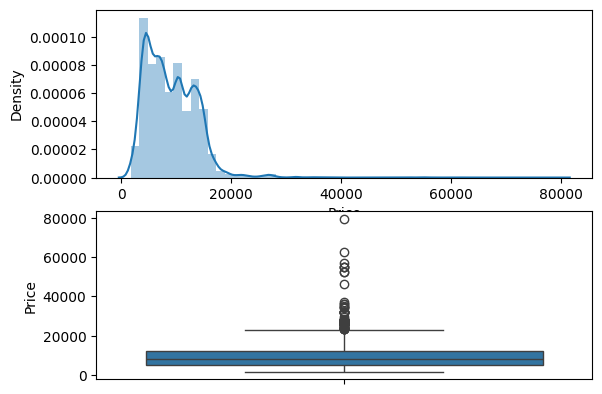

In [71]:
plot(final_df,'Price')

Handling outliers:
As there is some outliers in price feature,so we replace it with median.

In [72]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

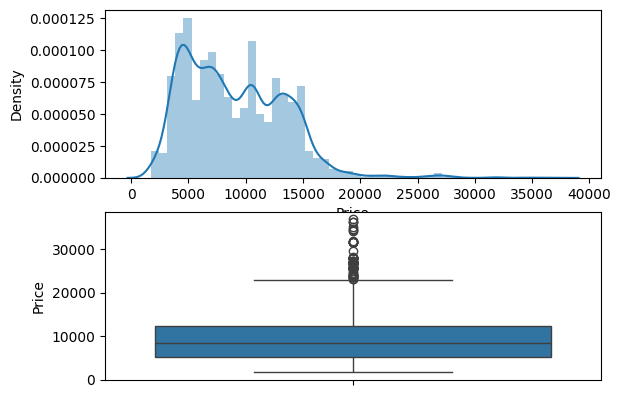

In [73]:
plot(final_df,'Price')

# Splitting the dataset for training and testing

In [74]:
X=final_df.drop('Price',axis=1)
y=df['Price']

# **Models**

In [75]:
# Converting a pandas DataFrame to a numpy array
X = X.to_numpy()

# Converting a pandas Series to a numpy array
y = y.to_numpy()


In [76]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)


In [77]:
X_train

array([[0, 1, 19, ..., 15, 1, 30],
       [1, 2, 7, ..., 15, 25, 45],
       [1, 3, 7, ..., 35, 13, 55],
       ...,
       [1, 3, 40, ..., 45, 4, 40],
       [2, 3, 34, ..., 15, 37, 20],
       [0, 1, 19, ..., 45, 1, 30]], dtype=object)

In [78]:
# Import libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Import and enable oneDAL optimizations
from sklearnex import patch_sklearn
patch_sklearn()  # Enables Intel optimizations

results = []

# Dictionary of models
models = {
    'LinearRegression': LinearRegression(),  # Optimized by oneDAL
    'Ridge': Ridge(),                        # Optimized by oneDAL
    'SGDRegressor': SGDRegressor(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'SVR': SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),  # Optimized by oneDAL
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'XGBRegressor': XGBRegressor(random_state=42),
    'LGBMRegressor': LGBMRegressor(random_state=42),
}

# Function to train and evaluate models
def try_model(model, name):
    try:
        model.fit(X_train, y_train)  # Train the model
        train_preds = model.predict(X_train)  # Predictions on train data
        test_preds = model.predict(X_test)    # Predictions on test data

        # Calculate R² scores
        train_r2_score = r2_score(y_train, train_preds)
        test_r2_score = r2_score(y_test, test_preds)

        # Calculate MSE
        train_mse = mean_squared_error(y_train, train_preds)
        test_mse = mean_squared_error(y_test, test_preds)

        # Store the results in a dictionary
        results.append({
            'Model': name,
            'Train R2 Score': train_r2_score,
            'Test R2 Score': test_r2_score,
            'Train MSE': train_mse,
            'Test MSE': test_mse
        })
    except Exception as e:
        print(f"Error occurred while trying model {name}: {e}")

# Train and test each model
for name, model in models.items():
    try_model(model, name)

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)
print(df_results)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 30
[LightGBM] [Info] Start training from score 9116.657812
                        Model  Train R2 Score  Test R2 Score     Train MSE  \
0            LinearRegression    6.264323e-01   6.603041e-01  8.129735e+06   
1                       Ridge    6.247440e-01   6.571878e-01  8.166475e+06   
2                SGDRegressor   -6.775561e+09  -7.856037e+09  1.474525e+17   
3                  ElasticNet    5.036239e-01   5.307816e-01  1.080234e+07   
4                       Lasso    6.260581e-01   6.601122e-01  8.137877e+06   
5                         SVR    4.813480e-01   5.145669e-01  1.128712e+07   
6   GradientBoostingRegressor    7.876496e-01  

# Lets apply few models to check the accuracy with model fitting charts

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [79]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Enable oneAPI Data Analytics Library optimizations
from sklearnex import patch_sklearn
patch_sklearn()  # Activates oneDAL acceleration

def evaluate_model(model, X_train, y_train, X_test, y_test):
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)

        # Calculate performance metrics
        train_r2 = r2_score(y_train, train_preds)
        test_r2 = r2_score(y_test, test_preds)
        mae = mean_absolute_error(y_test, test_preds)
        mse = mean_squared_error(y_test, test_preds)
        rmse = mse ** 0.5

        # Print the metrics
        print(f"Model: {model.__class__.__name__}")
        print(f"Training R² score: {train_r2:.4f}")
        print(f"Test R² score: {test_r2:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}\n")

        # Visualization of predictions and residuals
        plt.figure(figsize=(12, 6))

        # Scatter plot for predictions vs true values
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=y_test, y=test_preds)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.title('Predictions vs True Values')
        plt.xlabel('True Values')
        plt.ylabel('Predictions')

        # Residual plot
        plt.subplot(1, 2, 2)
        residuals = y_test - test_preds
        sns.scatterplot(x=test_preds, y=residuals)
        plt.axhline(0, color='red', linestyle='--')
        plt.title('Residuals vs Predictions')
        plt.xlabel('Predictions')
        plt.ylabel('Residuals')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error evaluating model {model.__class__.__name__}: {e}")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Model: KNeighborsRegressor
Training R² score: 0.7498
Test R² score: 0.6694
MAE: 1640.8402
MSE: 6364979.3100
RMSE: 2522.8911



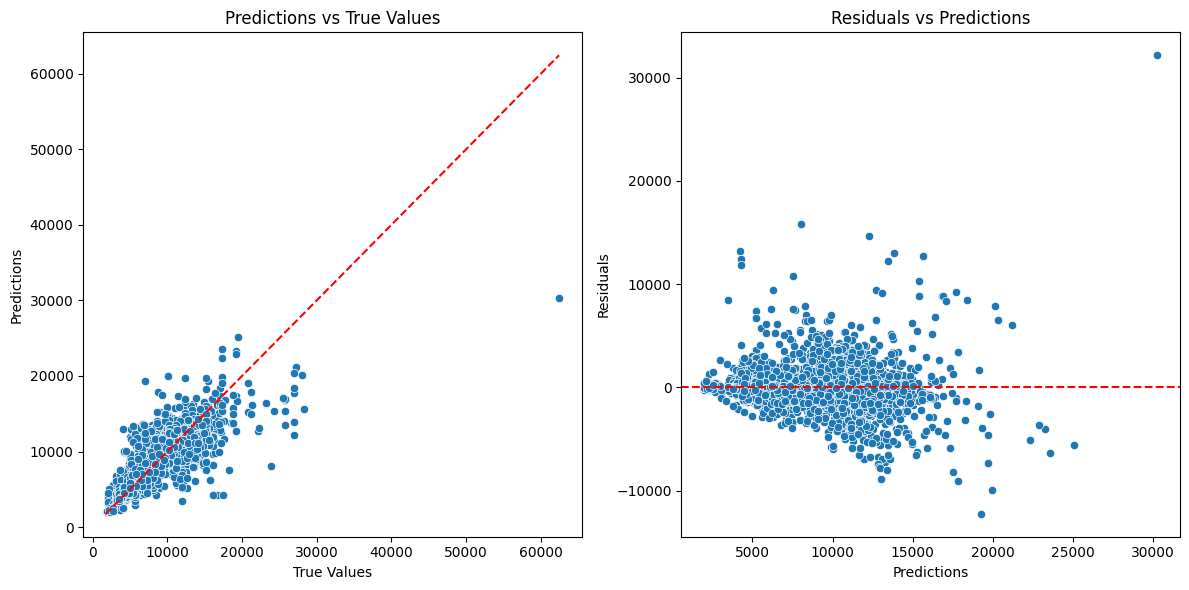

In [80]:
from sklearn.neighbors import KNeighborsRegressor

model_kneigh = KNeighborsRegressor()
evaluate_model(model_kneigh, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 30
[LightGBM] [Info] Start training from score 9116.657812
Model: LGBMRegressor
Training R² score: 0.8757
Test R² score: 0.8612
MAE: 1139.9272
MSE: 2672285.9685
RMSE: 1634.7128



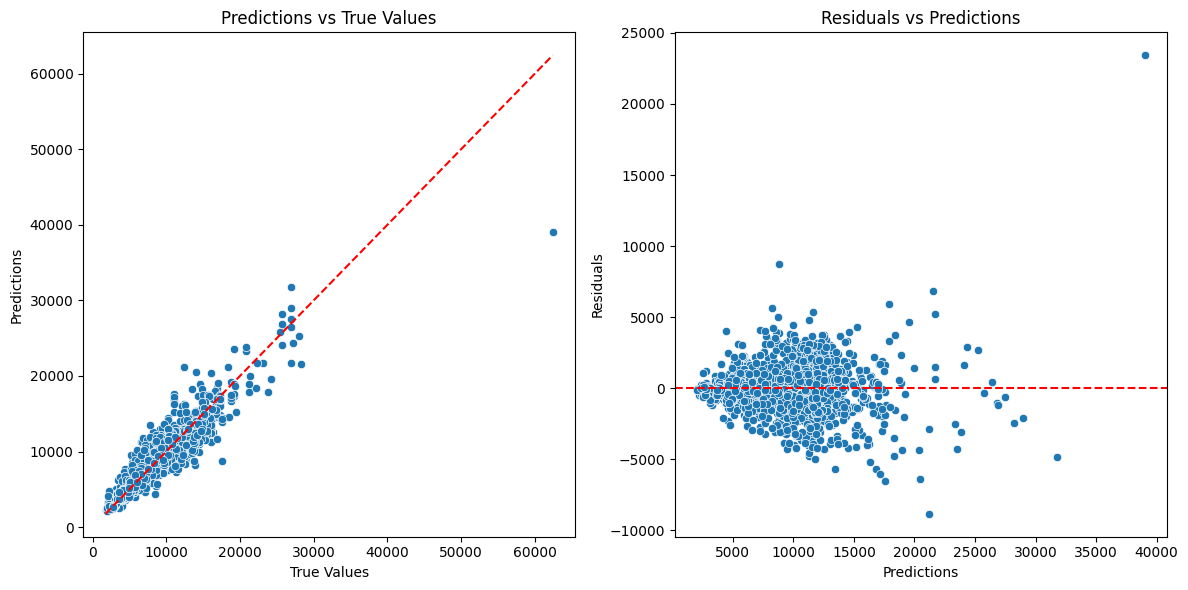

In [86]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
evaluate_model(model, X_train, y_train, X_test, y_test)

Model: RandomForestRegressor
Training R² score: 0.9548
Test R² score: 0.8372
MAE: 1088.5207
MSE: 3134904.4352
RMSE: 1770.5661



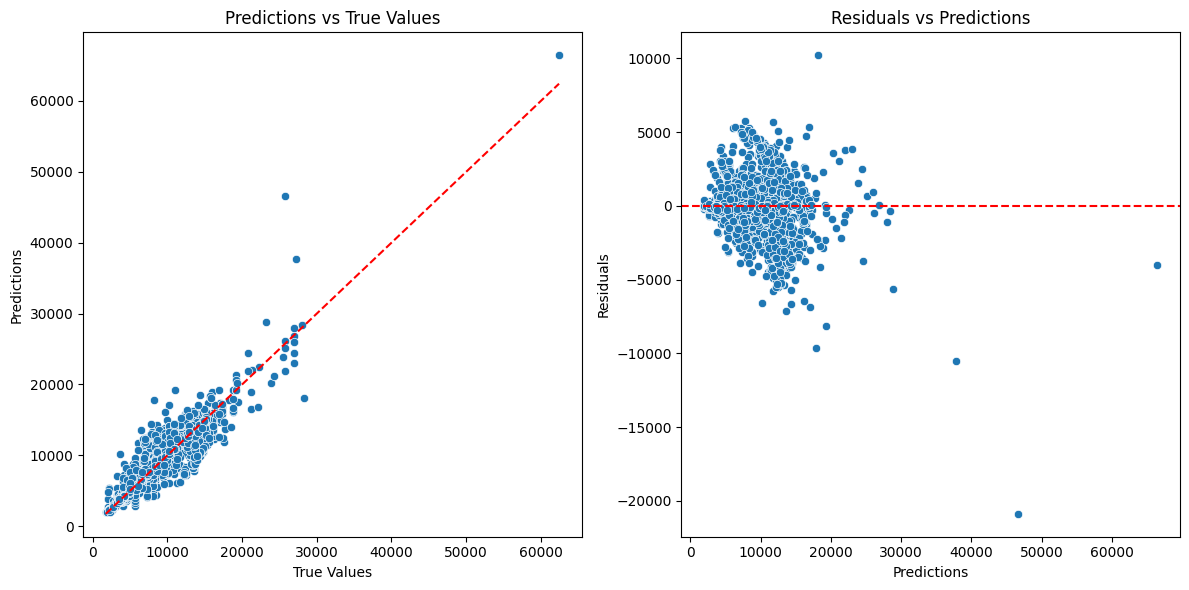

In [87]:
model_forest = RandomForestRegressor()
evaluate_model(model_forest, X_train, y_train, X_test, y_test)

Model: SVR
Training R² score: 0.0369
Test R² score: 0.0528
MAE: 3326.7581
MSE: 18239558.6322
RMSE: 4270.7796



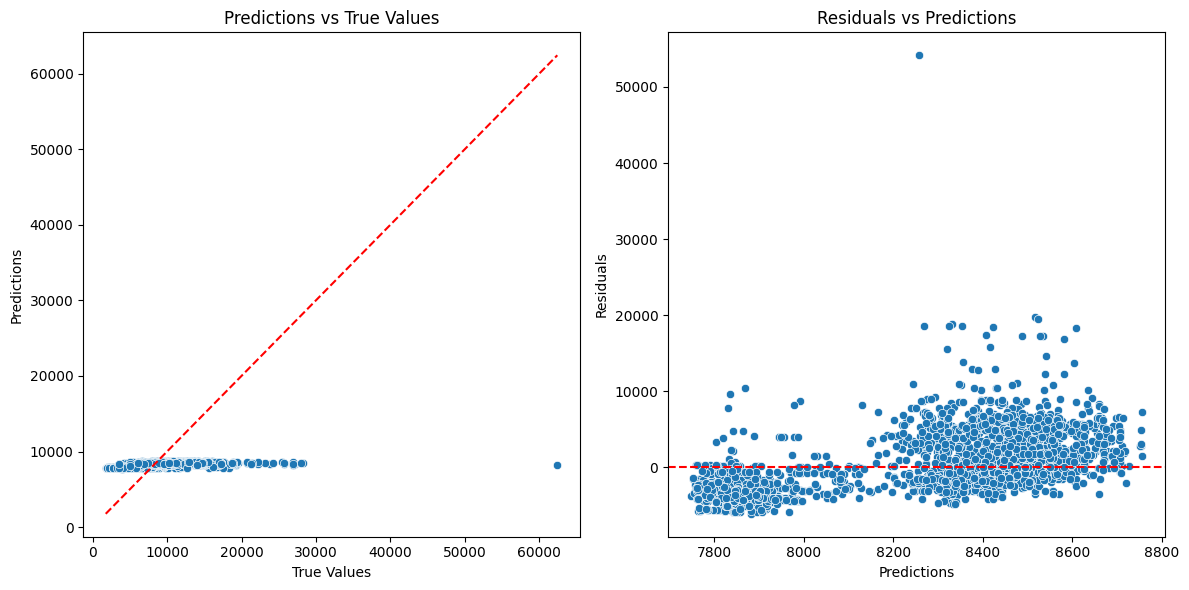

In [88]:
from sklearn.svm import SVR
model_svr = SVR()
evaluate_model(model_svr, X_train, y_train, X_test, y_test)

Model: GradientBoostingRegressor
Training R² score: 0.7876
Test R² score: 0.8050
MAE: 1439.7839
MSE: 3754838.7590
RMSE: 1937.7406



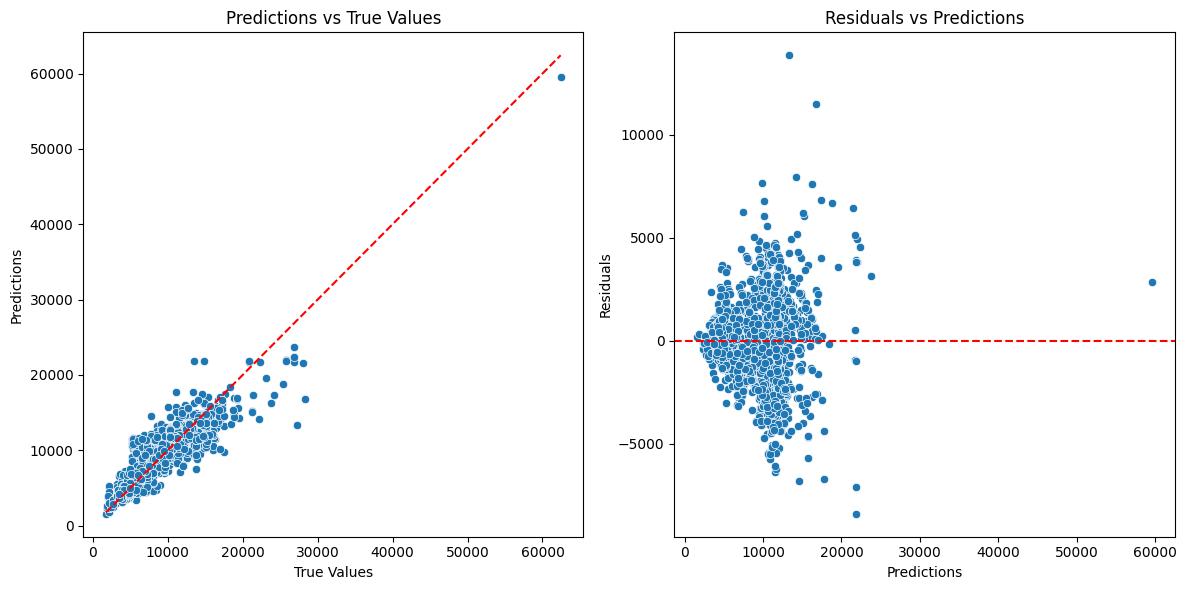

In [89]:
model_gra = GradientBoostingRegressor()
evaluate_model(model_gra, X_train, y_train, X_test, y_test)

# We can see that boosted models gets better R2 scores, but they maybe more prone to overfitting so we will check others models for now. We see that Gradient Boost model gets a R2 score of 0.805 and MAE of 1.4k, but we can try to hypertuning the model for better score

# **Hypertunning the model**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters (scikit-learn): {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}
R² Score (scikit-learn): 0.8438
MAE (scikit-learn): 1117.4248
MSE (scikit-learn): 3187273.7558
RMSE (scikit-learn): 1785.2937


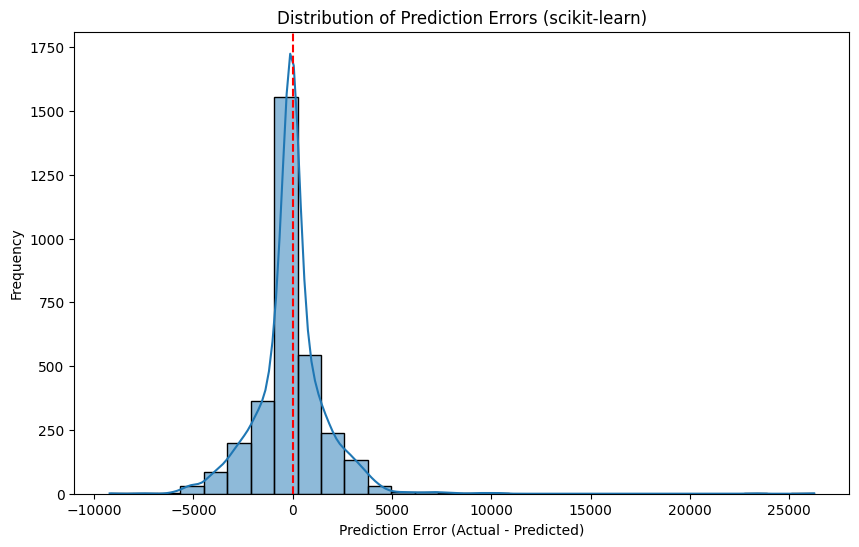

R² Score (oneDAL): 0.8087
MAE (oneDAL): 1134.3531
MSE (oneDAL): 3901678.8070
RMSE (oneDAL): 1975.2668


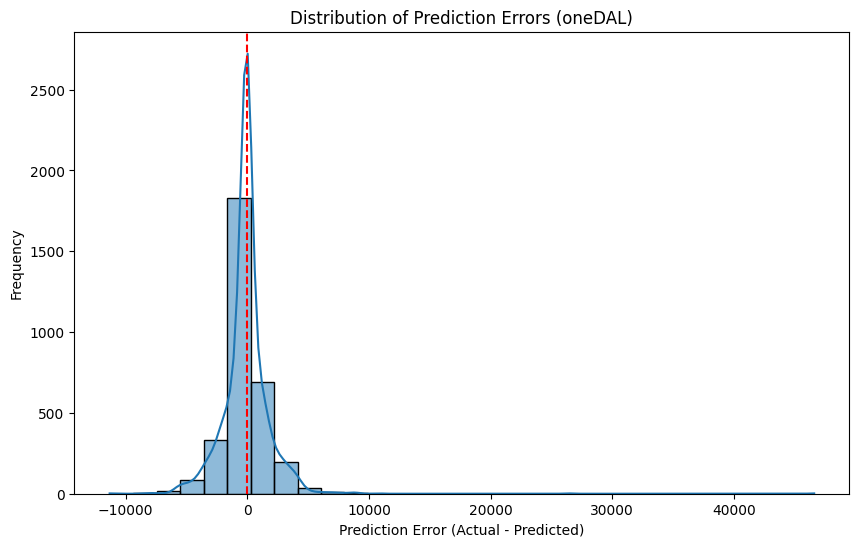

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Import necessary oneAPI libraries
from daal4py.sklearn.ensemble import RandomForestRegressor as oneDALRandomForestRegressor

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning with RandomizedSearchCV for scikit-learn RandomForestRegressor
random_grid = {
    'n_estimators': [100, 120, 150, 180, 200, 220],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 15, 20],
}

rf = RandomForestRegressor(random_state=42)  # Set random_state for reproducibility
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, 
                               cv=3, verbose=2, n_jobs=-1)

# Fit the model using scikit-learn
rf_random.fit(X_train, y_train)

# Best parameters
print("Best parameters (scikit-learn):", rf_random.best_params_)

# Predicting the values
prediction = rf_random.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)

print(f"R² Score (scikit-learn): {r2:.4f}")
print(f"MAE (scikit-learn): {mae:.4f}")
print(f"MSE (scikit-learn): {mse:.4f}")
print(f"RMSE (scikit-learn): {rmse:.4f}")

# Distribution plot between actual values and predicted values
plt.figure(figsize=(10, 6))
sns.histplot(y_test - prediction, bins=30, kde=True)
plt.title('Distribution of Prediction Errors (scikit-learn)')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Line at zero error
plt.show()

# Now let's use the oneDAL RandomForestRegressor
dal_rf = oneDALRandomForestRegressor(random_state=42)
dal_rf.fit(X_train, y_train)

# Predicting the values using oneDAL
dal_prediction = dal_rf.predict(X_test)

# Calculate evaluation metrics for oneDAL
dal_r2 = r2_score(y_test, dal_prediction)
dal_mae = mean_absolute_error(y_test, dal_prediction)
dal_mse = mean_squared_error(y_test, dal_prediction)
dal_rmse = np.sqrt(dal_mse)

print(f"R² Score (oneDAL): {dal_r2:.4f}")
print(f"MAE (oneDAL): {dal_mae:.4f}")
print(f"MSE (oneDAL): {dal_mse:.4f}")
print(f"RMSE (oneDAL): {dal_rmse:.4f}")

# Distribution plot between actual values and predicted values for oneDAL
plt.figure(figsize=(10, 6))
sns.histplot(y_test - dal_prediction, bins=30, kde=True)
plt.title('Distribution of Prediction Errors (oneDAL)')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Line at zero error
plt.show()


# After hypertuning we get a R2 score of 0.84, now we try using neural networks to see if it can fit non linear features

In [92]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'journey_day', 'journey_month',
       'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'dur_hour', 'dur_min'],
      dtype='object')

# Encoding the features for feeding the neural networks

In [93]:
X=final_df.drop('Price',axis=1)
y=df['Price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)
# One-hot encoding for categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [94]:
X_train = X_train.astype('float32')
X_test = X_train.astype('float32')
y_train = y_train.astype('float32')
y_test = y_train.astype('float32')


In [95]:
X_train.dtypes

Total_Stops                          float32
Route1                               float32
Route2                               float32
Route3                               float32
Route4                               float32
Route5                               float32
Air India                            float32
GoAir                                float32
IndiGo                               float32
Jet Airways                          float32
Jet Airways Business                 float32
Multiple carriers                    float32
Multiple carriers Premium economy    float32
SpiceJet                             float32
Trujet                               float32
Vistara                              float32
Vistara Premium economy              float32
Chennai                              float32
Delhi                                float32
Kolkata                              float32
Mumbai                               float32
Cochin                               float32
Delhi     

# Creating the a Sequential Model

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, batch_size=32)
X_train.dtypes

2024-10-25 16:46:00.684498: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-25 16:46:00.714141: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-25 16:46:00.843408: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-25 16:46:00.883798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1729874760.934186 1907878 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1729874760.94

Epoch 1/100


2024-10-25 16:46:03.801233: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 69268832.0000 - mae: 6845.8130
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17315084.0000 - mae: 2955.1914
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15127544.0000 - mae: 2654.9993
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15107238.0000 - mae: 2582.9722
Epoch 5/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13468063.0000 - mae: 2459.2341
Epoch 6/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13071146.0000 - mae: 2463.8025
Epoch 7/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12185076.0000 - mae: 2303.4502
Epoch 8/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10943498.0000 - mae: 2243.5173
Epoch 9/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11366367.0000 - mae: 2190.8979
Epoch 10/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9678748.0000 - mae: 2113.2864
Epoch 11/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9877376.0000 - mae: 2107.8052


Total_Stops                          float32
Route1                               float32
Route2                               float32
Route3                               float32
Route4                               float32
Route5                               float32
Air India                            float32
GoAir                                float32
IndiGo                               float32
Jet Airways                          float32
Jet Airways Business                 float32
Multiple carriers                    float32
Multiple carriers Premium economy    float32
SpiceJet                             float32
Trujet                               float32
Vistara                              float32
Vistara Premium economy              float32
Chennai                              float32
Delhi                                float32
Kolkata                              float32
Mumbai                               float32
Cochin                               float32
Delhi     

In [97]:
y_pred=model.predict(X_test)

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1481.0975341796875
Mean Squared Error (MSE): 4477734.5
Root Mean Squared Error (RMSE): 2116.06591796875
R-squared (R2): 0.7942445874214172


# We see that our R2 score is no better than the previous models, so we will try some other techniques like scaling the features to increase the scores of the previous models

In [103]:
!pip install daal4py --upgrade


Defaulting to user installation because normal site-packages is not writeable


RandomForest R² score: 0.9528
RandomForest MAE: 570.6842, MSE: 1026728.7270, RMSE: 1013.2762

LinearRegression R² score: 0.6264
LinearRegression MAE: 1962.5123, MSE: 8130122.5000, RMSE: 2851.3369

DecisionTree R² score: 0.9701
DecisionTree MAE: 323.1304, MSE: 650425.3482, RMSE: 806.4895

SupportVector R² score: 0.0588
SupportVector MAE: 3399.0794, MSE: 20482920.2183, RMSE: 4525.8060

KNeighbors R² score: 0.8371
KNeighbors MAE: 1123.9386, MSE: 3545270.7500, RMSE: 1882.8889



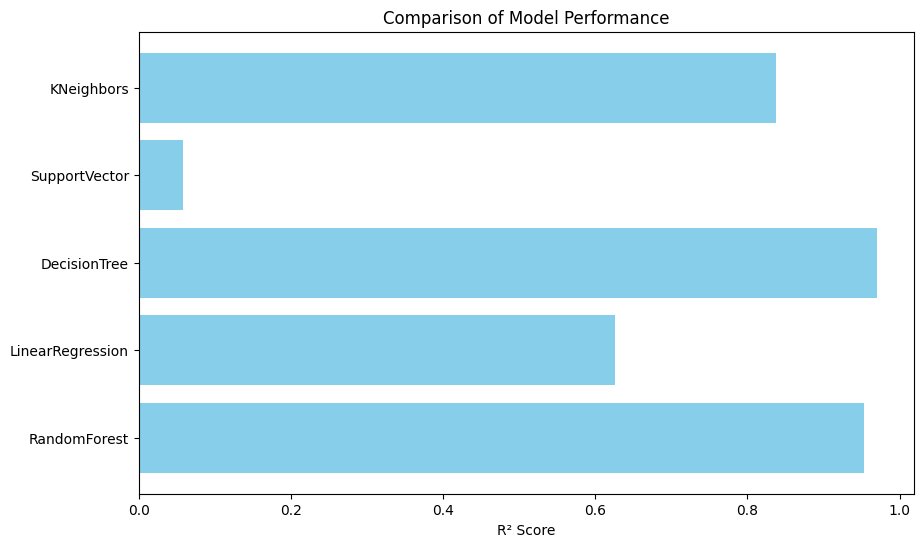

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models to evaluate
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'SupportVector': SVR(),
    'KNeighbors': KNeighborsRegressor()
}

# Dictionary to store the R² scores
r2_scores = {}

# Iterate over each model
for name, model in models.items():
    # For non-tree models, use scaled data
    if name in ['SupportVector', 'KNeighbors', 'LinearRegression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate and store the R² score
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2
    print(f"{name} R² score: {r2:.4f}")

    # Optionally calculate other metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}\n")

# Plotting the R² scores
plt.figure(figsize=(10, 6))
plt.barh(list(r2_scores.keys()), list(r2_scores.values()), color='skyblue')
plt.xlabel('R² Score')
plt.title('Comparison of Model Performance')
plt.show()

# We can see that our model performances have increased significantly after scaling the features and the most accurate ones were Random forest and Decision Trees, with a very low MAE and high R2 score. So we may suspect overfitting. We will now try to add cross validation function to check the authenticity.

In [105]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from daal4py.sklearn.ensemble import RandomForestRegressor as oneDALRandomForestRegressor  # oneAPI RandomForest

# 1. Cross-validation function
def evaluate_model(model):
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{model.__class__.__name__} CV Score: {cv_score.mean():.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}\n")
    return model

# 2. Hyperparameter tuning for RandomForestRegressor with oneAPI
rf = oneDALRandomForestRegressor(random_state=42)  # Use oneAPI version
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
best_rf = evaluate_model(rf_random)

# 3. Hyperparameter tuning for DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=dt_params, n_iter=10, cv=5, random_state=42, n_jobs=-1)
best_dt = evaluate_model(dt_random)

# 4. Bagging with DecisionTreeRegressor
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=100, random_state=42)
evaluate_model(bagging)

# 5. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
evaluate_model(gbr)


RandomizedSearchCV CV Score: 0.8029
R² Score: 0.9278
MAE: 732.0714
MSE: 1570552.6250
RMSE: 1253.2169

RandomizedSearchCV CV Score: 0.7344
R² Score: 0.8665
MAE: 1134.5024
MSE: 2905541.8174
RMSE: 1704.5650

BaggingRegressor CV Score: 0.7926
R² Score: 0.9536
MAE: 568.0792
MSE: 1009637.9924
RMSE: 1004.8074

GradientBoostingRegressor CV Score: 0.7718
R² Score: 0.7876
MAE: 1488.6236
MSE: 4621257.3854
RMSE: 2149.7110



GradientBoostingRegressor(random_state=42)

# So we may now conclude that BaggingRegressor has a high R2 score of 0.95 and with high a CV score, which shows it is not overfitting.

# Now we will save our model

In [106]:
import joblib

# Save the Bagging Regressor model
joblib.dump(bagging, 'bagging_regressor_model.joblib')

print("Bagging Regressor model saved as 'bagging_regressor_model.joblib'")


Bagging Regressor model saved as 'bagging_regressor_model.joblib'


# We can load our model for later use

In [107]:
# Load the saved Bagging Regressor model
loaded_bagging_model = joblib.load('bagging_regressor_model.joblib')

print("Loaded Bagging Regressor model successfully.")


Loaded Bagging Regressor model successfully.
